In [1]:
import pandas as pd, os, numpy as np, matplotlib.pyplot as plt
from matplotlib.widgets import Slider
os.chdir('D:\DA PROJECT\Movies Database')

# FUNCTION FOR GENERATING DF WITHOUT REPEATED ROWS:

In [2]:
def df_no_rep():
    movies=pd.read_csv('movies_19th_century.csv',index_col='imdbID').append(pd.read_csv('movies_20th_century.csv',index_col='imdbID')).append(pd.read_csv('movies_21st_century.csv',index_col='imdbID'))
    g=pd.read_csv('genres.csv',index_col='imdbID')
    
    # Removing entries with type as series
    movies=movies[movies['Type']=='movie']

    # Excluding unwanted columns and rearranging the columns
    movies=movies[['Title','Year','Country','Language','Awards',  'Director',  'Production', 'Rated','Released', 'Runtime',  'imdbRating','imdbVotes']]


    # Adding the first genre corresponding to each movie. Subsequent genres of the same movie have been overlooked.
    movies=movies.merge(g[~g.index.duplicated(keep='first')].drop(columns=['Unnamed: 0']),on='imdbID')

    # Correcting the Datatype of the Votes column
    movies.imdbVotes=movies['imdbVotes'].str.replace(",","").astype('float')

    # Creating a new column which contains the decade of release of the movie.
    movies['Decade']=movies.Year-movies.Year%10


    #  CONVERTING THE DIFFERENT FORMATS OF RUNTIME INTO UNIFIED FORMAT - MINUTES


    # Runtimes of the format "125 min"
    movies.loc[(movies['Runtime'].str.contains('min')==True)&(movies['Runtime'].str.contains('h')==False),'Runtime']=movies.loc[(movies['Runtime'].str.contains('min')==True)&(movies['Runtime'].str.contains('h')==False),'Runtime'].str.replace(' min','').str.replace(',','').str.replace('.','').astype('int')

    # Handling special cases with a typo in the format - of the format "1 h 25 mi"
    movies.loc[movies.index=="tt0249614",'Runtime']=2323
    movies.loc[movies.index=="tt3355838",'Runtime']=940
    movies.loc[movies.index=="tt0467544",'Runtime']=2000

    # Runimes of the format "1 h"
    movies.loc[(movies['Runtime'].str.contains('min')==False)&(movies['Runtime'].str.contains('h')==True),'Runtime']=movies.loc[(movies['Runtime'].str.contains('min')==False)&(movies['Runtime'].str.contains('h')==True),'Runtime'].str.replace(' h','').astype('int')


    # Runtimes of the format "1 h 25 min"
    movies.loc[(movies['Runtime'].str.contains('h')==True)&(movies['Runtime'].str.contains('m')==True),'Runtime'] = movies.loc[(movies['Runtime'].str.contains('h')==True)&(movies['Runtime'].str.contains('m')==True),'Runtime'].str.split(' h ').str[0].astype(float)*60 + movies.loc[(movies['Runtime'].str.contains('h')==True)&(movies['Runtime'].str.contains('m')==True),'Runtime'].str.split(' h ').str[1].str.split(' ').str[0].astype('float')


    # Finally converting the entire column to float type
    movies['Runtime']=movies['Runtime'].astype('float')
    
    return movies

# FUNCTION FOR GENERATING DF WITH REPEATED ROWS:

In [3]:
def df_with_rep():
    movies=pd.read_csv('movies_19th_century.csv',index_col='imdbID').append(pd.read_csv('movies_20th_century.csv',index_col='imdbID')).append(pd.read_csv('movies_21st_century.csv',index_col='imdbID'))
    g=pd.read_csv('genres.csv',index_col='imdbID')
    
    # Removing entries with type as series
    movies=movies[movies['Type']=='movie']

    # Excluding unwanted columns and rearranging the columns
    movies=movies[['Title','Year','Country','Language','Awards',  'Director',  'Production', 'Rated','Released', 'Runtime',  'imdbRating','imdbVotes']]


    # Merging the genres df onto movies. For movies having 1+ genres, multiple rows are created here.
    movies=movies.merge(g.drop(columns=['Unnamed: 0']),on='imdbID')
    
    # stripping genre column of whitespace:
    movies.Genre=movies.Genre.str.strip()
    
    # Removing rows with shorts as genre--- this step also removes movies which have single genre "short"
    movies=movies[~movies.Genre.str.contains('Short')]

    # Correcting the Datatype of the Votes column
    movies.imdbVotes=movies['imdbVotes'].str.replace(",","").astype('float')

    # Creating a new column which contains the decade of release of the movie.
    movies['Decade']=movies.Year-movies.Year%10


    
    
    #  CONVERTING THE DIFFERENT FORMATS OF RUNTIME INTO UNIFIED FORMAT - MINUTES


    # Runtimes of the format "125 min"
    movies.loc[(movies['Runtime'].str.contains('min')==True)&(movies['Runtime'].str.contains('h')==False),'Runtime']=movies.loc[(movies['Runtime'].str.contains('min')==True)&(movies['Runtime'].str.contains('h')==False),'Runtime'].str.replace(' min','').str.replace(',','').str.replace('.','').astype('int')

    # Handling special cases with a typo in the format - of the format "1 h 25 mi"
    movies.loc[movies.index=="tt0249614",'Runtime']=2323
    movies.loc[movies.index=="tt3355838",'Runtime']=940
    movies.loc[movies.index=="tt0467544",'Runtime']=2000

    # Runimes of the format "1 h"
    movies.loc[(movies['Runtime'].str.contains('min')==False)&(movies['Runtime'].str.contains('h')==True),'Runtime']=movies.loc[(movies['Runtime'].str.contains('min')==False)&(movies['Runtime'].str.contains('h')==True),'Runtime'].str.replace(' h','').astype('int')


    # Runtimes of the format "1 h 25 min"
    movies.loc[(movies['Runtime'].str.contains('h')==True)&(movies['Runtime'].str.contains('m')==True),'Runtime'] = movies.loc[(movies['Runtime'].str.contains('h')==True)&(movies['Runtime'].str.contains('m')==True),'Runtime'].str.split(' h ').str[0].astype(float)*60 + movies.loc[(movies['Runtime'].str.contains('h')==True)&(movies['Runtime'].str.contains('m')==True),'Runtime'].str.split(' h ').str[1].str.split(' ').str[0].astype('float')


    # Finally converting the entire column to float type
    movies['Runtime']=movies['Runtime'].astype('float')
    
    return movies

# 

# CREATING OBJECTS FOR BOTH DATAFRAMES:

In [4]:
movies_with_rep=df_with_rep()
movies_no_rep=df_no_rep()

C:\Users\PHILIP\AppData\Local\Temp/ipykernel_9268/1153077167.py:34: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movies.loc[(movies['Runtime'].str.contains('min')==True)&(movies['Runtime'].str.contains('h')==False),'Runtime']=movies.loc[(movies['Runtime'].str.contains('min')==True)&(movies['Runtime'].str.contains('h')==False),'Runtime'].str.replace(' min','').str.replace(',','').str.replace('.','').astype('int')
C:\Users\PHILIP\AppData\Local\Temp/ipykernel_9268/2007545.py:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movies.loc[(movies['Runtime'].str.contains('min')==True)&(movies['Runtime'].str.contains('h')==False),'Runtime']=movies.loc[(movies['Runtime'].str.contains('m

In [8]:
movies_with_rep[movies_with_rep['Genre'].str.contains('Family|Animation', regex=T)]

,Title,Year,Country,Language,Awards,Director,Production,Rated,Released,Runtime,imdbRating,imdbVotes,Genre,Decade
imdbID,,,,,,,,,,,,,,
tt0911003,Home,1998,USA,"English, Polish",NaN,Luke Sieczek,NaN,NaN,10 Nov 2006,30.0,NaN,NaN,Drama,1990
tt1756553,Home,1972,Norway,Norwegian,NaN,Kirsten Sørlie,NaN,NaN,28 Nov 1972,NaN,NaN,NaN,Drama,1970
tt3232928,Home,1951,USA,English,NaN,Duke Goldstone,NaN,NaN,NaN,4.0,NaN,NaN,Music,1950
tt0200716,Home,1998,UK,English,Won 1 BAFTA Film Award. Another 5 wins & 1 nom...,Morag McKinnon,NaN,NaN,NaN,11.0,6.8,312.0,Drama,1990
tt0825475,Home,1998,USA,English,NaN,Douglas Buck,NaN,NaN,NaN,28.0,6.2,75.0,Horror,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt3406810,Home,2014,New Zealand,English,NaN,Adam Reynolds,NaN,NaN,20 Jul 2014,15.0,NaN,NaN,Drama,2010
tt2977530,Home,2013,USA,English,NaN,Moses Navarro,NaN,NaN,11 Apr 2013,NaN,NaN,NaN,Drama,2010
tt2224026,Home,2015,USA,"English, French",2 wins & 9 nominations.,Tim Johnson,Dreamworks,PG,27 Mar 2015,94.0,6.7,81351.0,Animation,2010


# 

# 

# COMPARING THE 5 MOST POPULAR GENRES ACROSS THE DECADES:

<IPython.core.display.Javascript object>


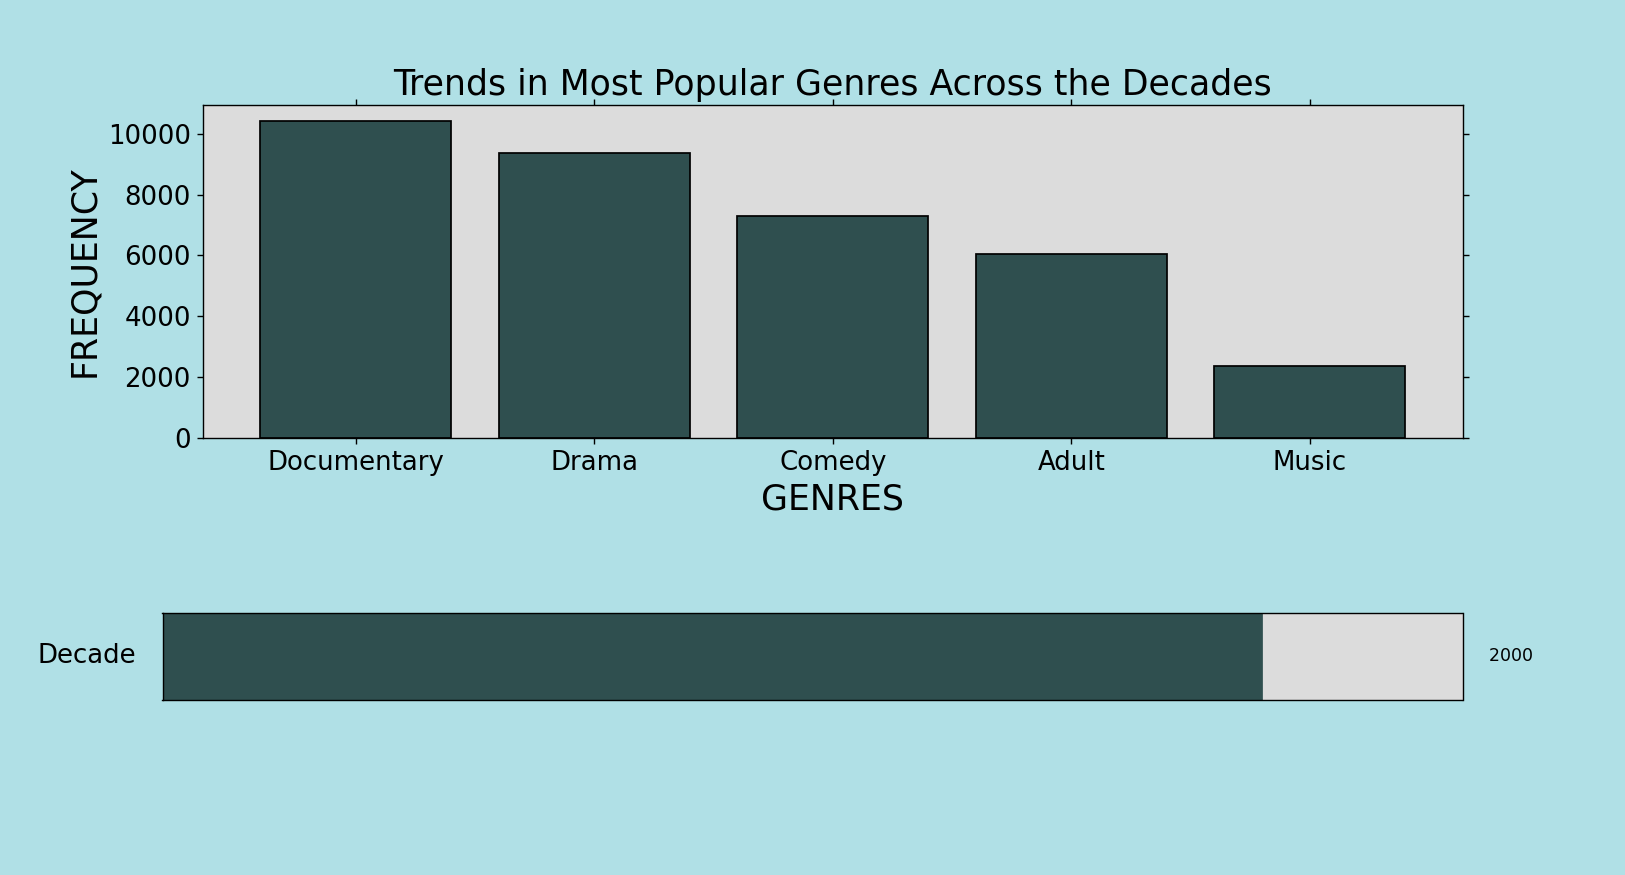

In [5]:
%matplotlib notebook
fig, ax=plt.subplots(figsize=(13,7))
plt.subplots_adjust(bottom=0.5) # adjusting the space below fig to make space for slider

ax_slider=plt.axes([0.10,0.2,0.8,0.1], facecolor='gainsboro') # creating the slider as another plt axes




a=Slider(ax_slider, label='Decade', valmin=1890 ,valmax=2020, valinit=1890, valstep=10, color="darkslategrey") # initiating the slider
a.label.set_size(15)

ax.set_facecolor('gainsboro')
fig.set_facecolor('powderblue')
ax.set_title("Trends in Most Popular Genres Across the Decades", fontsize=20)

def update(val):
#     current_val=a.val # this stores the current position of the slider
    ax.cla() # clears the plot with every movement of the slider
    plt.xticks(rotation=0, fontsize=15)
    temp_dict=movies_with_rep[movies_with_rep.Decade==val].groupby('Genre').agg('count').sort_values(['Title'],ascending=False).Title.head(5).to_dict()
    ax.bar(temp_dict.keys(),temp_dict.values(), color='darkslategrey', edgecolor='black')
    ax.set_xlabel("GENRES", fontsize=20)
    ax.set_ylabel("FREQUENCY", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title("Trends in Most Popular Genres Across the Decades", fontsize=20)
    
   
    

a.on_changed(update) # call the update function when the slider changes

plt.show()

<b>This is a dynamic visualization of the 5 most popular genres across the decades. Since a movie can have multiple genres, the frequencies represent instances of the genre. The decade under focus can be changed using the slider and this enables us to understand the changing trends in preferred genres across the time period.

The 1890s and early 1900s: Documentaries and Comedies are most popular. The majority of films produced in this era are short films. However, we have avoided the classification of Short as a genre as we assume it to be more like a type of film rather than a genre of its own. Hence, the data shows the secondary genres that the short films may have had during this era.

1920s and 1930s: Comedy is the most popular genre in this period, and it is closely followed by drama films. This era of silent films was a remarkable period for comedy movies, with legends like Charlie Chaplin with his "Modern Times" and Buster Keaton.

1940s: Animation comes in the top 5 genres in this decade. Animation films were beginning to become more popular with the success of Walt Disney's Steamboat Willie. This decade saw many big titles from the Disney Studios.


Action is a popular genre during 1970-1990

Drama and Comedy movies remain the most popular throughout many decades as the visualization shows.

The data for the 2020 decade is comparitively less and hence it is not sure whether the observed trends in genre popularity are reflective of the true situation.</b>

# 

# 

# 

# GENRES RELEASING SEASONALLY:

# HORROR MOVIES:

In [19]:
hor=movies_with_rep[movies_with_rep['Genre']=='Horror']

In [20]:
hor['rel_month']=pd.to_datetime(hor['Released']).dt.month_name()

<ipython-input-20-5c4380eafb8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hor['rel_month']=pd.to_datetime(hor['Released']).dt.month_name()


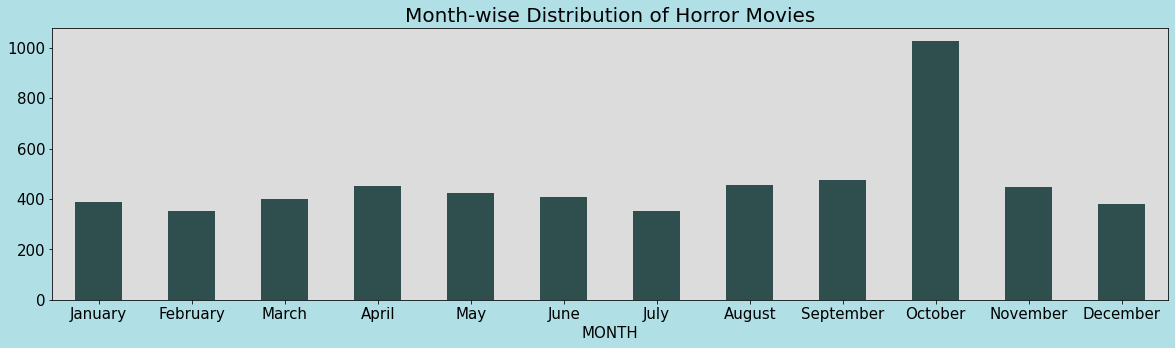

In [207]:
%matplotlib inline

months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax=plt.subplots(figsize=(20,5))
hor.groupby('rel_month').agg('count')['Title'].reindex(months, axis=0).plot(kind="bar", color="darkslategrey", ax=ax)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
ax.set_facecolor("gainsboro")
ax.set_title("Month-wise Distribution of Horror Movies", fontsize=20)
ax.set_xlabel("MONTH", fontsize=15)
fig.set_facecolor("powderblue")
plt.show()

<b>Here we look at the month-wise frequency of release of films with Horror as one of its genres. We see that October is the most popular month for releasing horror movies as movie producers aim to cash in on the general mood created by the festival of Halloween celebrated worlwide. All the remaining months record almost the same number of horror films released, but the frequency for October is more than double of these and this shows that it is a very attractive month for horror film releases.</b>

# 

# CHILDREN'S MOVIES

In [144]:
family_anim=movies_with_rep[(movies_with_rep['Genre']=='Family') | (movies_with_rep['Genre']=='Animation')]
family_anim['rel_month']=pd.to_datetime(family_anim['Released']).dt.month_name()

<ipython-input-144-bf1a7f397455>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_anim['rel_month']=pd.to_datetime(family_anim['Released']).dt.month_name()


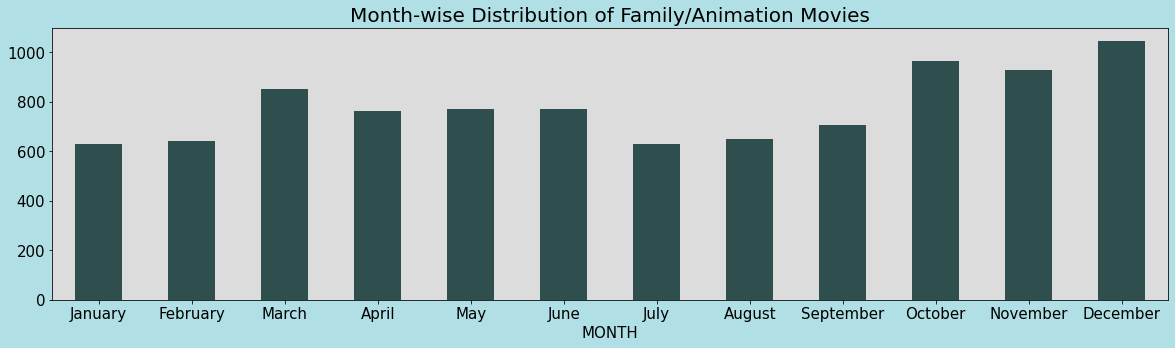

In [145]:
%matplotlib inline

months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax=plt.subplots(figsize=(20,5))
family_anim.groupby('rel_month').agg('count')['Title'].reindex(months, axis=0).plot(kind="bar",color="darkslategray", ax=ax)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
ax.set_facecolor("gainsboro")
ax.set_title("Month-wise Distribution of Family/Animation Movies", fontsize=20)
ax.set_xlabel("MONTH", fontsize=15)
fig.set_facecolor("powderblue")
plt.show()

<b>Here, we look at the month wise distribution for movies that have either Family or Animation as one of its genres. This is done assumning that movies with these particular genres mostly attract families and kids. Hence, we want to understand whether there are any favourable seasons for releasing movies of these genres. We see that March has a relatively higher frequency. This could be due to the Spring break in the US that begins in late March and goes on till Easter. More families and  kids are expected to watch films during this spring break. 

However, we see that the most popular month for releasing family/kids themed movies is December. This is a clear reflection of the effect the Christmas-new year holidays during which a large majority of kids around the world enjoy a vacation. Families and kids are most probable to enjoy a film during this season and hence producers of these genres choose this season to release their films.</b>

# 

# 

# 

# EFFECT OF GOLDEN AGE OF ADULT FILMS IN THE USA:

<IPython.core.display.Javascript object>


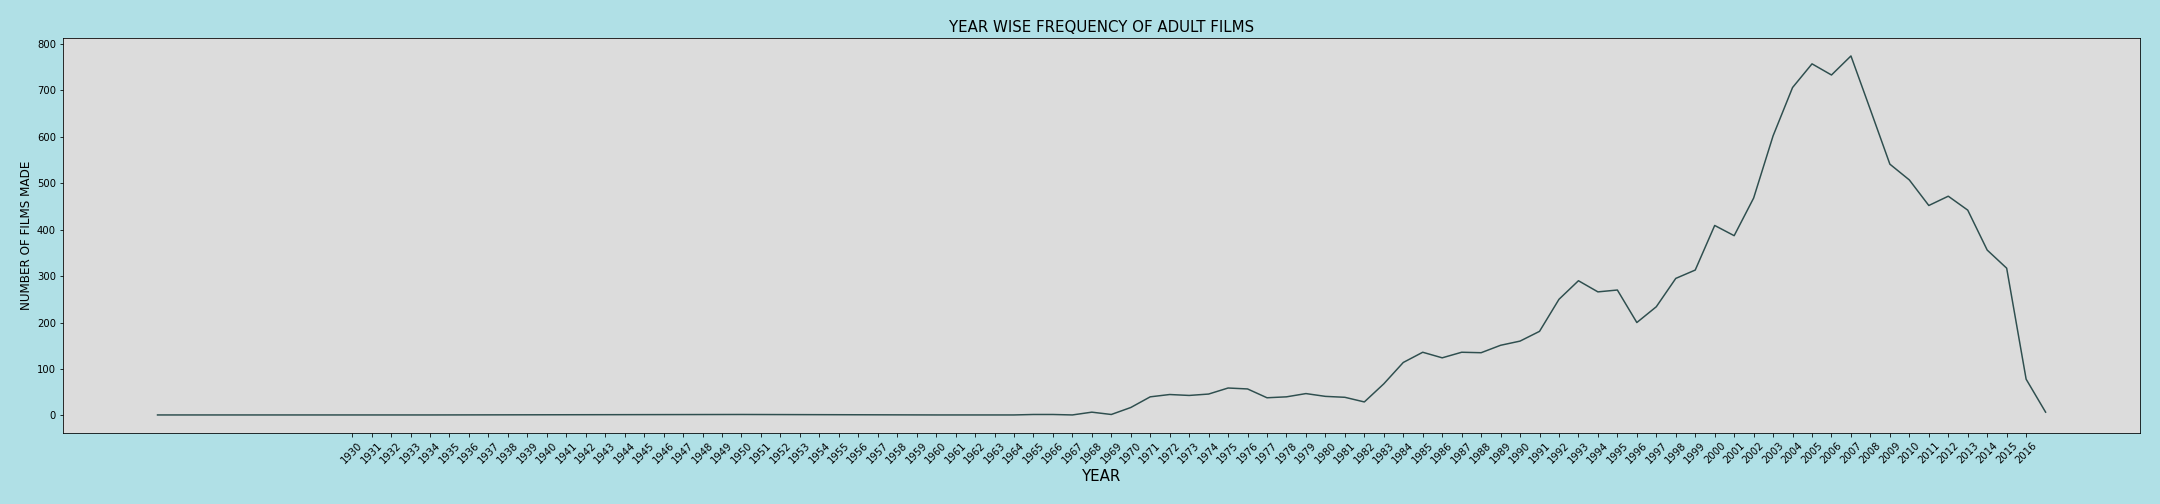

In [263]:
%matplotlib notebook
fig, ax=plt.subplots(figsize=(30,7))

ax.plot(movies_with_rep[movies_with_rep['Genre']=='Adult'].groupby('Year').agg('count')['Title'], color="darkslategray")
ax.set_xticks(np.arange(start=1930,stop=2017,step=1))
plt.xticks(rotation=45, fontsize=10)
ax.set_facecolor("gainsboro")
fig.set_facecolor("powderblue")
ax.set_xlabel("YEAR", fontsize=15)
ax.set_ylabel("NUMBER OF FILMS MADE", fontsize=12)
ax.set_title("YEAR WISE FREQUENCY OF ADULT FILMS", fontsize=15)
fig.tight_layout(pad=2)
plt.show()

<b>The visualization represents the long term trend in the number of adult movies produced across the years. We see that until the late 60s, the number of adult films remained extremely low. Around the year 1969, we observe the clear beginning of an upward trend in the number of adult films made. This increased trend is actually a reflection of the effect of the "GOLDEN AGE" of pornographic films in the american socitey. This was a 15-year period during which pornographic films began to receive widespread attention from the public and film critics. The changing attitudes prompted the production of an increasing number of adult films.

    
This steady upward trend continues all through the late 90s and early 2000s, but we see that it peaks around 2004-2005 following which it begins to drop sharply. This sudden drop could possibly be explained by the advent of the internet age in the early early to mid 2000s. The internet user base began to grow exponentially during this period, and the Adult films industry also began expanding its activities on the internet. This resulted in a major shift from fully produced adult films being distributed through VCR/DVD to more widely produced videos based on distrubution websites. This is why we see the decline in formally produced adult film titles post 2006-07.</b>